## Grupo 23

**Nombre:** Raúl Miguel Carrero Martín 
**Nia**: 100451286 
**Grupo de clase**: 81

**Nombre:** Gonzalo Vela Sacristán
**Nia**: 100472334
**Grupo de clase**: 84

# 1.- Importar las librerías

In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2.- Predicciones del modelo final

Primero importamos el archivo *modelo_final.pkl* para generar el mejor modelo obtenido en el archivo *eda.ipynb*. Posteriormente leeremos los datos de competición *wind_comp.cs* y los formatearemos para que puedan ser predecidos para ello se elimina toda la información que no sea de la estación número 13 asi como la columna *datetime*.

Por último, se predicen dichos datos con `model.predict(comp_df)` y se exportan al archivo ***predicciones.csv***. Para observar dichas predicciones se ha decidido realizar una gráfica donde se muestran los valores.

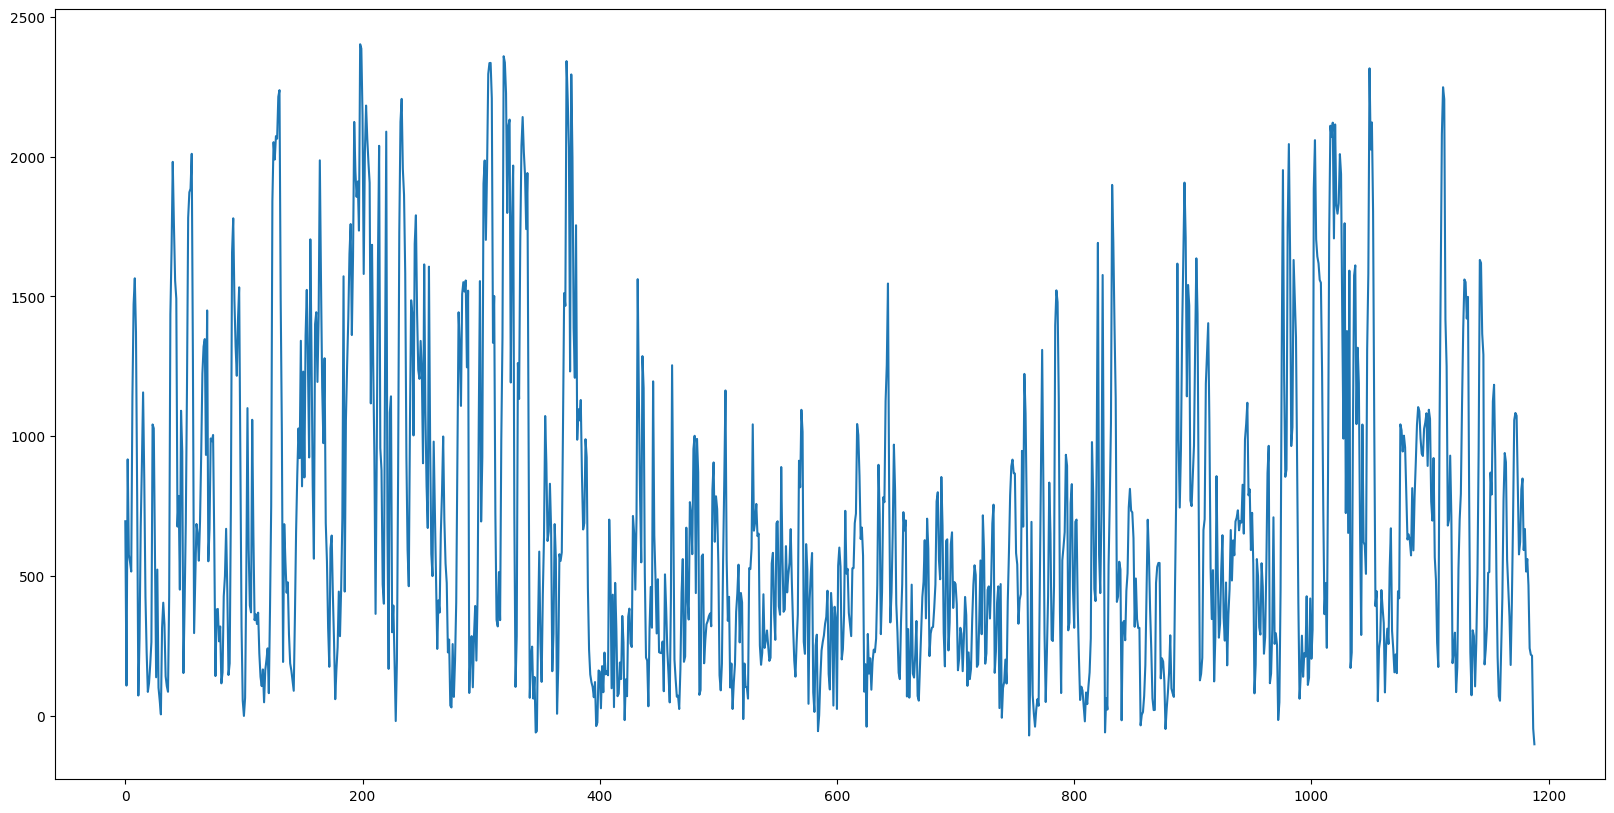

In [4]:
#leemos el archivo pickle
with open('modelo_final.pkl', 'rb') as f:
    model = pickle.load(f)

#read wind_comp.csv
comp_data = pd.read_csv('data/wind_comp.csv')
# eliminar columnas no necesarias excepto datetime y .13
comp_data = comp_data.filter(regex='datetime|\.13', axis=1)
comp_df = comp_data.copy()
comp_df = comp_df.drop(columns=['datetime'])
comp_df = comp_df.drop(columns=['lai_lv.13','u10n.13','v10n.13'])

pred = model.predict(comp_df)
pred_df = pd.DataFrame(pred, columns=['Energy (pred)'])
# concatena con comp_data
comp_pred = pd.concat([pred_df, comp_data], axis=1)
# exporta a csv
comp_pred.to_csv('predicciones.csv', index=False)

#scatter plot de las predicciones extiende mas hacia a la derecha
plt.plot(range(len(pred_df)), pred_df, label='predicciones', figure=plt.figure(figsize=(20, 10)))
